In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/SigmaCampNext-2025`


In [19]:
using Images, Colors, LinearAlgebra, MAT, Statistics, CairoMakie

In [3]:
facefile = matopen("DATA/allFaces.mat")

MAT.MAT_v5.Matlabv5File(IOStream(<file DATA/allFaces.mat>), false, #undef)

In [4]:
k = keys(facefile)

KeySet for a Dict{String, Int64} with 6 entries. Keys:
  "faces"
  "m"
  "sub"
  "nfaces"
  "person"
  "n"

In [5]:
n = read(facefile,"n")

192.0

In [6]:
m = read(facefile,"m")

168.0

In [36]:
nfaces = Int64.(vec(read(facefile,"nfaces")))

38-element Vector{Int64}:
 64
 62
 64
 64
 62
 64
 64
 64
 64
 64
 60
 59
 60
  ⋮
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64
 64

In [37]:
allPersonIdx = cumsum(nfaces).+1
pushfirst!(allPersonIdx,1)
pop!(allPersonIdx)
allPersonIdx

38-element Vector{Int64}:
    1
   65
  127
  191
  255
  317
  381
  445
  509
  573
  637
  697
  756
    ⋮
 1643
 1707
 1771
 1835
 1899
 1963
 2027
 2091
 2155
 2219
 2283
 2347

In [7]:
faces = read(facefile,"faces")

32256×2410 Matrix{Float64}:
 80.0  94.0  59.0  16.0  69.0  53.0  …  3.0  3.0  3.0  3.0  3.0  4.0  4.0
 81.0  87.0  67.0  14.0  67.0  52.0     3.0  2.0  3.0  4.0  4.0  4.0  3.0
 80.0  88.0  66.0  14.0  67.0  52.0     3.0  2.0  3.0  4.0  2.0  4.0  4.0
 79.0  87.0  74.0  15.0  69.0  50.0     3.0  4.0  2.0  2.0  3.0  4.0  4.0
 80.0  88.0  75.0  15.0  67.0  53.0     2.0  4.0  4.0  4.0  4.0  4.0  4.0
 82.0  86.0  76.0  15.0  70.0  53.0  …  4.0  4.0  3.0  5.0  3.0  3.0  5.0
 79.0  93.0  85.0  15.0  72.0  57.0     3.0  4.0  3.0  4.0  4.0  3.0  5.0
 80.0  92.0  91.0  17.0  70.0  54.0     3.0  4.0  4.0  3.0  3.0  3.0  4.0
 83.0  90.0  92.0  16.0  68.0  52.0     4.0  4.0  4.0  3.0  3.0  3.0  4.0
 82.0  89.0  92.0  15.0  68.0  52.0     3.0  4.0  3.0  3.0  3.0  3.0  3.0
 78.0  87.0  89.0  16.0  68.0  51.0  …  3.0  4.0  2.0  4.0  3.0  3.0  4.0
 81.0  86.0  88.0  16.0  69.0  51.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 82.0  89.0  91.0  16.0  68.0  51.0     3.0  3.0  2.0  3.0  2.0  3.0  3.0
  ⋮       

In [8]:
n*m

32256.0

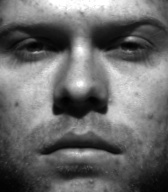

In [11]:
Gray.(reshape(faces[:,3],(Int(n),Int(m)))/255)

In [38]:
different_faces = faces[:,allPersonIdx]

32256×38 Matrix{Float64}:
 80.0  86.0  80.0  64.0   10.0  57.0  …  30.0  43.0  71.0  78.0  33.0  70.0
 81.0  79.0  81.0  66.0    7.0  59.0     42.0  44.0  71.0  77.0  33.0  74.0
 80.0  77.0  80.0  66.0    7.0  58.0     60.0  41.0  70.0  76.0  32.0  69.0
 79.0  74.0  79.0  65.0    5.0  60.0     77.0  42.0  69.0  76.0  31.0  72.0
 80.0  72.0  78.0  66.0    5.0  59.0     80.0  44.0  69.0  76.0  30.0  70.0
 82.0  71.0  79.0  65.0    6.0  60.0  …  78.0  46.0  68.0  77.0  31.0  72.0
 79.0  68.0  78.0  66.0   11.0  60.0     82.0  50.0  65.0  78.0  28.0  74.0
 80.0  60.0  78.0  67.0   20.0  61.0     91.0  46.0  65.0  76.0  26.0  71.0
 83.0  59.0  77.0  67.0   28.0  62.0     98.0  47.0  63.0  76.0  25.0  73.0
 82.0  49.0  76.0  63.0   35.0  62.0     97.0  49.0  59.0  77.0  24.0  68.0
 78.0  42.0  78.0  62.0   49.0  60.0  …  93.0  50.0  58.0  74.0  22.0  67.0
 81.0  36.0  78.0  63.0   64.0  60.0     91.0  50.0  53.0  77.0  21.0  69.0
 82.0  38.0  76.0  62.0   69.0  58.0     87.0  49.0  45.0  76.

In [80]:
allPersons = zeros(6*192,6*168)
for i in 0:5
    for j in 0:5
        this_face = reshape(different_faces[:,j+1+6*i],(192,168))
        allPersons[i*192+1:(i+1)*192,j*168+1:(j+1)*168] = this_face
    end
end

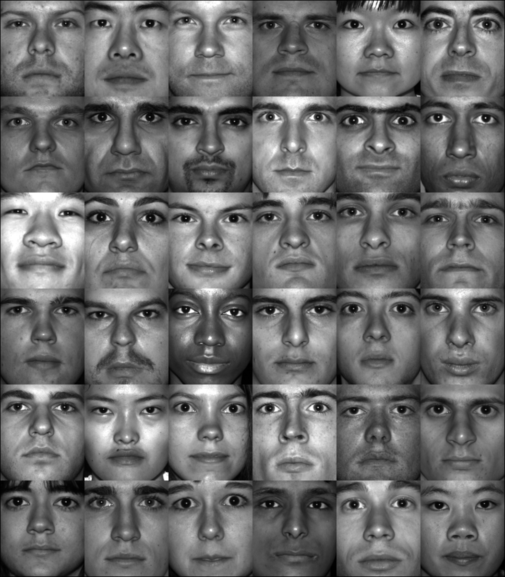

In [81]:
Gray.(allPersons./255)

In [63]:
avg_face = mean(faces, dims=2)

32256×1 Matrix{Float64}:
 61.29087136929461
 61.8792531120332
 62.128630705394194
 62.190871369294605
 62.16224066390041
 62.38215767634855
 62.64522821576764
 62.99045643153527
 63.10414937759336
 62.953941908713695
 62.554771784232365
 62.460165975103735
 62.28713692946058
  ⋮
 42.950622406639006
 41.79336099585062
 41.31078838174274
 41.09253112033195
 40.70082987551867
 40.29211618257261
 39.897510373443986
 40.382572614107886
 40.317842323651455
 40.50290456431535
 41.24356846473029
 41.63360995850623

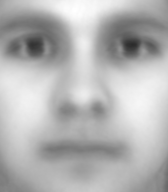

In [17]:
Gray.(reshape(avg_face[:,1],(Int(n),Int(m)))/maximum(avg_face))

In [16]:
faces_norm = faces .- avg_face

32256×2410 Matrix{Float64}:
  18.7091    32.7091   -2.29087  -45.2909  …  -58.2909  -57.2909  -57.2909
  19.1207    25.1207    5.12075  -47.8793     -57.8793  -57.8793  -58.8793
  17.8714    25.8714    3.87137  -48.1286     -60.1286  -58.1286  -58.1286
  16.8091    24.8091   11.8091   -47.1909     -59.1909  -58.1909  -58.1909
  17.8378    25.8378   12.8378   -47.1622     -58.1622  -58.1622  -58.1622
  19.6178    23.6178   13.6178   -47.3822  …  -59.3822  -59.3822  -57.3822
  16.3548    30.3548   22.3548   -47.6452     -58.6452  -59.6452  -57.6452
  17.0095    29.0095   28.0095   -45.9905     -59.9905  -59.9905  -58.9905
  19.8959    26.8959   28.8959   -47.1041     -60.1041  -60.1041  -59.1041
  19.0461    26.0461   29.0461   -47.9539     -59.9539  -59.9539  -59.9539
  15.4452    24.4452   26.4452   -46.5548  …  -59.5548  -59.5548  -58.5548
  18.5398    23.5398   25.5398   -46.4602     -59.4602  -59.4602  -59.4602
  19.7129    26.7129   28.7129   -46.2871     -60.2871  -59.2871  -59.28

In [123]:
u,s,v = svd(faces_norm)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
32256×2410 Matrix{Float64}:
  0.00101153  -0.00786302  0.00219546  …   0.00389153    0.159875
  0.001035    -0.00791857  0.0021889       0.00247577   -0.0301542
  0.00102295  -0.00792825  0.00217489      0.000339171  -0.0416269
  0.00104709  -0.00793656  0.00210541      0.000796177   0.00769562
  0.00108035  -0.00792083  0.00201839      0.00137079    0.00368664
  0.00111542  -0.00791302  0.00196432  …   0.00235807   -0.0338412
  0.0011343   -0.00790884  0.00184214      0.0012783     0.0788136
  0.00115721  -0.00792839  0.00176757      0.00115303    0.0108904
  0.00116641  -0.00794331  0.00170702     -0.000338044   0.017448
  0.00123337  -0.00791386  0.00165968     -0.00170495    0.00387056
  0.00128165  -0.00786361  0.00157742  …  -9.26846e-5   -0.0497537
  0.00133298  -0.00784317  0.00145847      0.00105308    0.0158299
  0.00137666  -0.00781205  0.00132131     -1.41515e-5    0.00757996
  ⋮                              

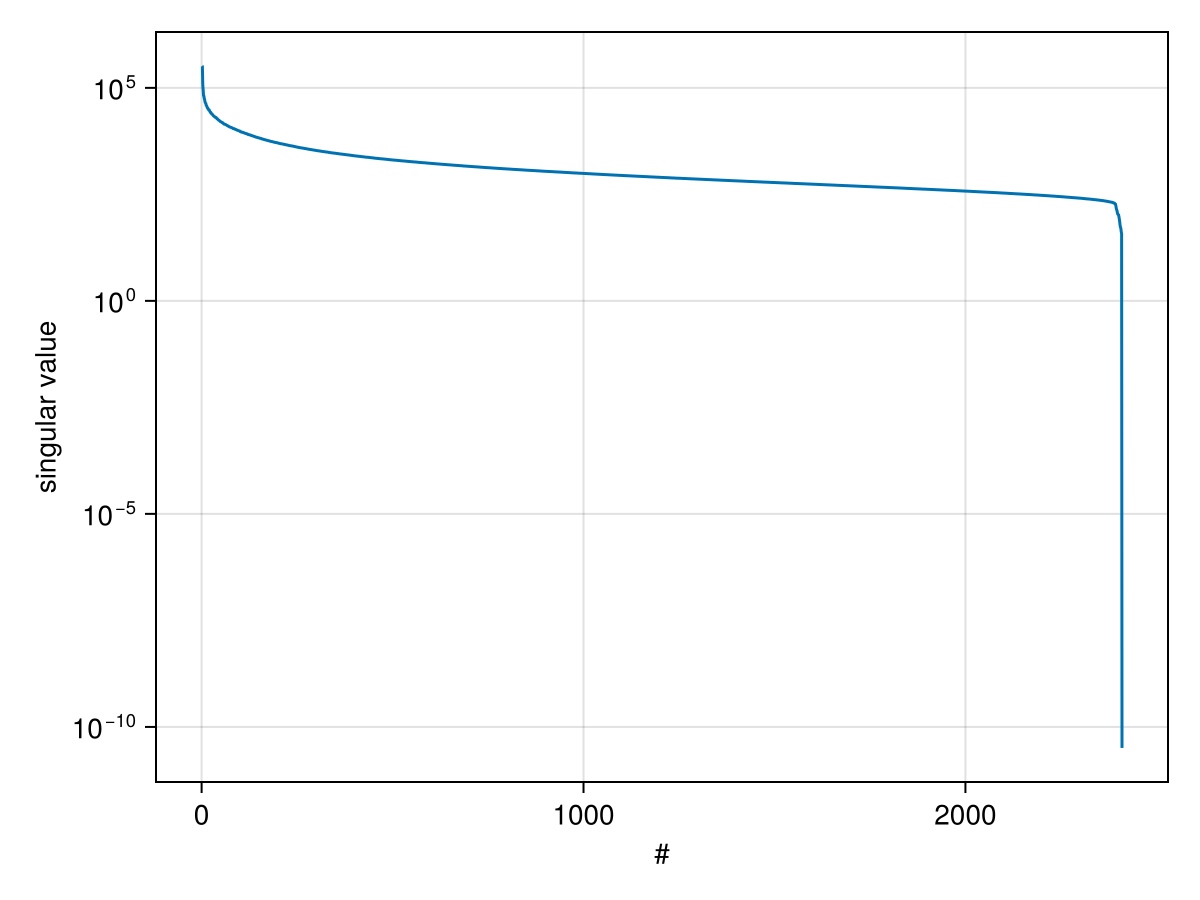

In [27]:
f = Figure()
ax = CairoMakie.Axis(f[1,1],xlabel = "#",yscale=log10,ylabel="singular value")
lines!(ax,s)
f

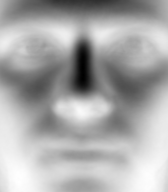

In [101]:
eigenface = reshape(u[:,3],(192,168))
eigenface_scaled = (eigenface .- minimum(eigenface))./(maximum(eigenface)-minimum(eigenface))
Gray.(eigenface_scaled)

In [114]:
s_mod = s

2410-element Vector{Float64}:
 632.933555727934
   4.068852745081408e7
  54.69111807055802
   1.1641442553938212e7
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   ⋮
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

In [115]:
s_mod = s
s_mod[1] = s_mod[1]/2
s_mod[2] = s_mod[2]*2
s_mod[3] = s_mod[3]/3
s_mod[4] = s_mod[4]*2
s_mod[5] = 0
s_mod[6:end] .= 0

2410-element Vector{Float64}:
 316.466777863967
   8.137705490162817e7
  18.230372690186005
   2.3282885107876424e7
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   ⋮
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

In [122]:
s

2410-element Vector{Float64}:
 79.11669446599176
  3.2550821960651267e8
  2.0255969655762227
  9.31315404315057e7
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

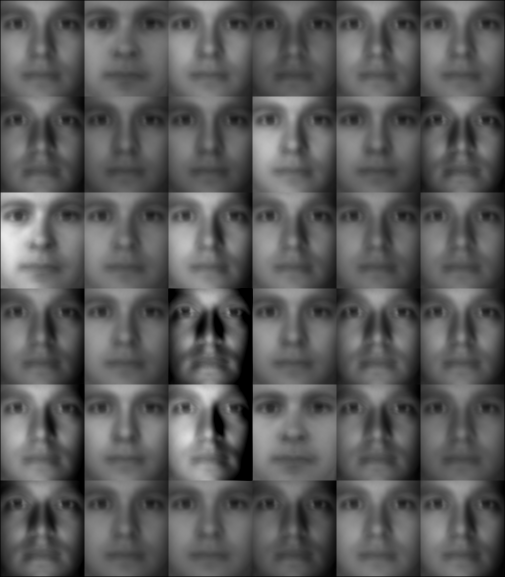

In [127]:
s_mod = copy(s)
s_mod[1] = s_mod[1]/2
s_mod[2] = s_mod[2]*2
s_mod[3] = s_mod[3]/3
s_mod[4] = s_mod[4]*2
s_mod[5] = 0
s_mod[6:end] .= rand(length(s_mod[6:end]))
x = u * Diagonal(s_mod) * v'
x = x .+ avg_face
different_x = x[:,allPersonIdx]
allx = zeros(6*192,6*168)
for i in 0:5
    for j in 0:5
        this_face = reshape(different_x[:,j+1+6*i],(192,168))
        allx[i*192+1:(i+1)*192,j*168+1:(j+1)*168] = this_face
    end
end
Gray.(allx./255)

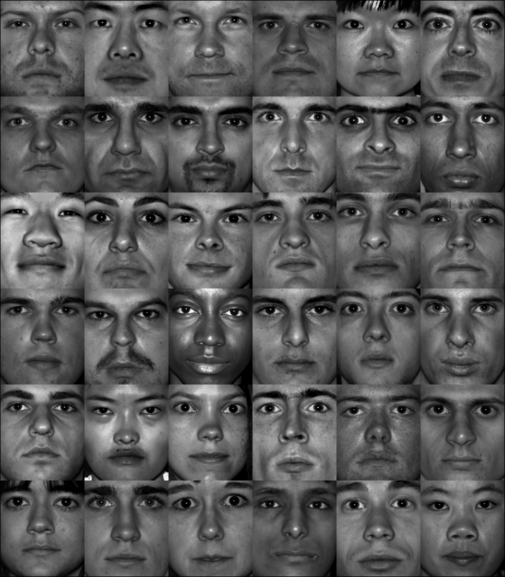

In [98]:
Gray.(allx./255)

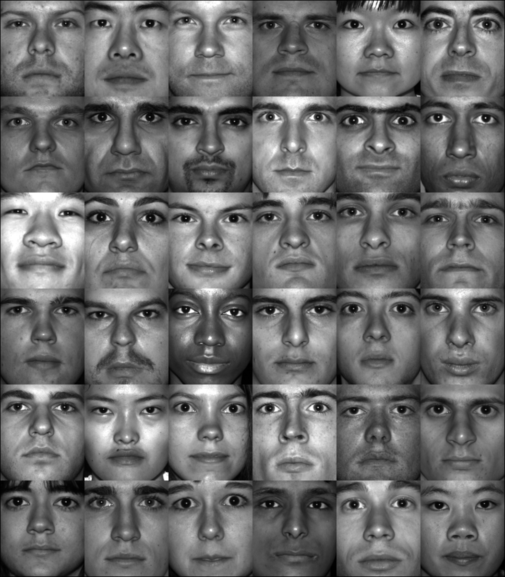

In [51]:
Gray.(allPersons./255)